# Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Split into features and Target

In [3]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

# Feature scaling
not important for Naive Bayes

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Train Test Spliting

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.75,random_state=50)

# Model Fitting

In [7]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [8]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [9]:
y_pred = nb_model.predict(X_test)

# Accuracy Testing

In [10]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [11]:
confusion_matrix(y_test,y_pred)

array([[68,  2],
       [ 7, 23]], dtype=int64)

In [12]:
accuracy_score(y_test,y_pred)

0.91

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        70
           1       0.92      0.77      0.84        30

    accuracy                           0.91       100
   macro avg       0.91      0.87      0.89       100
weighted avg       0.91      0.91      0.91       100



# Model Visualization

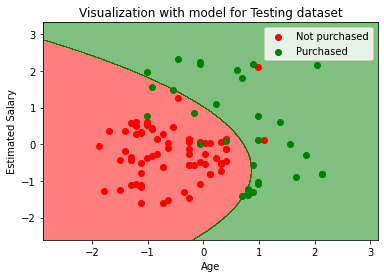

In [16]:
#Visualization for testing dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, nb_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Testing dataset")
plt.show()

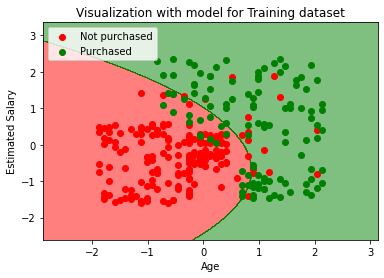

In [17]:
#Visualization for training dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, nb_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()